## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [128, 256, 512]
MOMENTUM = 0.95

In [7]:
results = {}
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

for batch in BATCH_SIZE:
    model.fit(x_train,
              y_train, 
              epochs=EPOCHS, 
              batch_size=batch, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = f'Exp-{batch}'
    results[exp_name_tag] = {
        'train-loss': train_loss,
        'valid-loss': valid_loss,
        'train-acc': train_acc,
        'valid-acc': valid_acc
    }

W0804 19:30:29.428087  9420 deprecation_wrapper.py:119] From D:\Software\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 19:30:29.445011  9420 deprecation_wrapper.py:119] From D:\Software\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 19:30:29.448004  9420 deprecation_wrapper.py:119] From D:\Software\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0804 19:30:29.530147  9420 deprecation_wrapper.py:119] From D:\Software\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0804 19:30:29.773494  9420 deprecation_wrapper.py:119] Fr

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 7s 132us/step - loss: 0.2796 - acc: 0.9036 - val_loss: 2.5842 - val_acc: 0.4523
Epoch 50/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.2672 - acc: 0.9079 - val_loss: 2.4992 - val_acc: 0.4675
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.1490 - acc: 0.9595 - val_loss: 2.2357 - val_acc: 0.5045
Epoch 2/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.1033 - acc: 0.9796 - val_loss: 2.1890 - val_acc: 0.5111
Epoch 3/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.0918 - acc: 0.9829 - val_loss: 2.2579 - val_acc: 0.5073
Epoch 4/50
50000/50000 [==============================] - 4s 89us/step - loss: 0.0835 - acc: 0.9853 - val_loss: 2.2655 - val_acc: 0.5088
Epoch 5/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.0773 - acc: 0.9876 - val_loss: 2.3004 - val_acc: 0.5089

Epoch 8/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.0063 - acc: 1.0000 - val_loss: 2.9308 - val_acc: 0.5139
Epoch 9/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.0063 - acc: 1.0000 - val_loss: 2.9448 - val_acc: 0.5128
Epoch 10/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.0064 - acc: 0.9999 - val_loss: 2.9514 - val_acc: 0.5108
Epoch 11/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.0062 - acc: 1.0000 - val_loss: 2.9488 - val_acc: 0.5138
Epoch 12/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.0062 - acc: 1.0000 - val_loss: 2.9386 - val_acc: 0.5110
Epoch 13/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.0061 - acc: 1.0000 - val_loss: 2.9553 - val_acc: 0.5128
Epoch 14/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.0059 - acc: 1.0000 - val_loss: 2.9601 - val_acc: 0.5122
Epoch 15/50
50000/50000 [===========

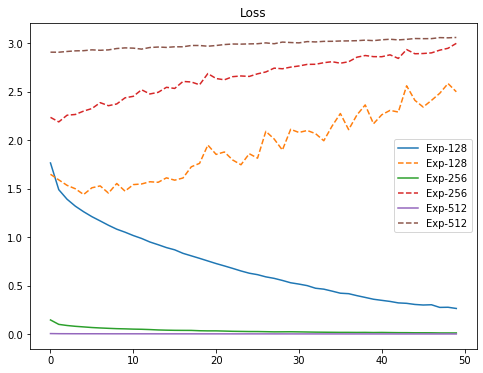

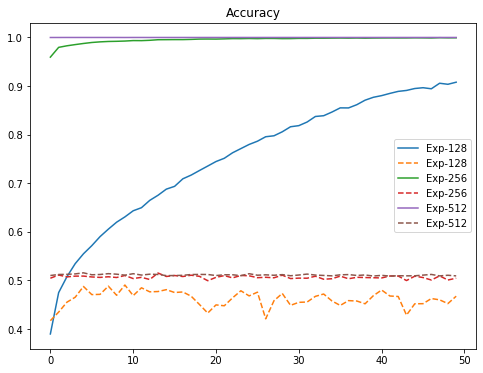

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond)
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond)
plt.title("Accuracy")
plt.legend()
plt.show()